In [78]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from xmitgcm import open_mdsdataset
from xgcm import Grid
%matplotlib inline

In [90]:
path = '/data/home/liutongya/RCLV/velocity/run_offline/run/'
ds0 = open_mdsdataset(path, prefix={'Diag_stat'}).chunk()
ds0

<xarray.Dataset>
Dimensions:  (XC: 3600, XG: 3600, YC: 1600, YG: 1600, Z: 1, Zl: 1, Zp1: 2, Zu: 1, time: 9859)
Coordinates:
  * XC       (XC) >f4 0.05 0.15 0.25 0.35 0.45 ... 359.65 359.75 359.85 359.95
  * YC       (YC) >f4 -79.95 -79.85 -79.75 -79.65 ... 79.65 79.75 79.85 79.95
  * XG       (XG) >f4 -2.7755576e-17 0.1 0.2 0.3 0.4 ... 359.6 359.7 359.8 359.9
  * YG       (YG) >f4 -80.0 -79.9 -79.8 -79.7 -79.6 ... 79.5 79.6 79.7 79.8 79.9
  * Z        (Z) >f4 -50.0
  * Zp1      (Zp1) >f4 0.0 -100.0
  * Zu       (Zu) >f4 -100.0
  * Zl       (Zl) >f4 0.0
    rA       (YC, XC) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    dxG      (YG, XC) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    dyG      (YC, XG) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    rAz      (YG, XG) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    dxC      (YC, XG) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    dyC      (YG, XC) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    rAw      (YC, XG) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    rAs      (YG, XC) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    drC      (Zp1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    drF      (Z) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    PHrefC   (Z) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    PHrefF   (Zp1) >f4 dask.array<chunksize=(2,), meta=np.ndarray>
    hFacC    (YC, XC) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    hFacW    (YC, XG) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    hFacS    (YG, XC) >f4 dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    maskC    (YC, XC) bool dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    maskW    (YC, XG) bool dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    maskS    (YG, XC) bool dask.array<chunksize=(1600, 3600), meta=np.ndarray>
    rhoRef   (Z) >f4 dask.array<chunksize=(1,), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 00:00:01 00:00:02 ... 02:44:18 02:44:19
Data variables:
    UVEL     (time, YC, XG) float32 dask.array<chunksize=(1, 1600, 3600), meta=np.ndarray>
    VVEL     (time, YG, XC) float32 dask.array<chunksize=(1, 1600, 3600), meta=np.ndarray>
    PhiVEL   (time, YC, XC) float32 dask.array<chunksize=(1, 1600, 3600), meta=np.ndarray>
    PsiVEL   (time, YG, XG) float32 dask.array<chunksize=(1, 1600, 3600), meta=np.ndarray>

In [84]:
def write_field(fname, data):
    print('wrote to file: ' + fname)
    fid = open(fname, "wb")
    data.tofile(fid)
    fid.close()

## LAT

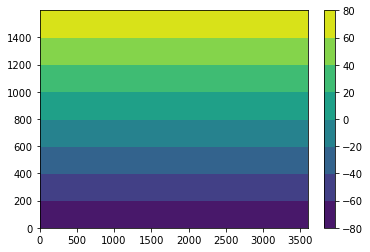

In [91]:
lat2d = np.zeros((1600, 3600))

for i in np.arange(3600):
    lat2d[:, i] = ds0.YC.values

plt.contourf(lat2d)
plt.colorbar()

In [92]:
out_path = '/data/home/liutongya/mixing/BINS/'

fn = out_path + 'lat_tracer.bin'
lat2d = lat2d.astype('>f4')

write_field(fn, lat2d)

wrote to file: /data/home/liutongya/mixing/BINS/lat_tracer.bin


## WOA SST

In [93]:
ds = xr.open_dataset('/data/home/liutongya/mixing/data/woa_sst_2018.nc')
ds

/data/home/liutongya/.conda/envs/geo_scipy/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/data/home/liutongya/.conda/envs/geo_scipy/lib/python3.7/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


<xarray.Dataset>
Dimensions:      (LAT: 720, LEV1_1: 1, LON: 1440, TIME: 1, bnds: 2)
Coordinates:
  * LON          (LON) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * LAT          (LAT) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * LEV1_1       (LEV1_1) float64 0.0
  * TIME         (TIME) object -001-01-15 00:00:00
Dimensions without coordinates: bnds
Data variables:
    LEV1_1_bnds  (LEV1_1, bnds) float64 ...
    TAN          (TIME, LEV1_1, LAT, LON) float32 ...
Attributes:
    history:      FERRET V6.5  17-Jun-21
    Conventions:  CF-1.0

In [94]:
# convert -180-180 to 0-360
lon_name = 'LON'  # whatever name is in the data

# Adjust lon values
ds['_longitude_adjusted'] = xr.where(
    ds[lon_name] < 0,
    ds[lon_name] + 360,
    ds[lon_name])

# reassign the new coords to as the main lon coords
# and sort DataArray using new coordinate values

ds = (ds.swap_dims({lon_name: '_longitude_adjusted'})
      .sel(**{'_longitude_adjusted': sorted(ds._longitude_adjusted)}).drop(lon_name))
ds = ds.rename({'_longitude_adjusted': lon_name})
ds

<xarray.Dataset>
Dimensions:      (LAT: 720, LEV1_1: 1, LON: 1440, TIME: 1, bnds: 2)
Coordinates:
  * LAT          (LAT) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * LEV1_1       (LEV1_1) float64 0.0
  * TIME         (TIME) object -001-01-15 00:00:00
  * LON          (LON) float64 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
Dimensions without coordinates: bnds
Data variables:
    LEV1_1_bnds  (LEV1_1, bnds) float64 ...
    TAN          (TIME, LEV1_1, LAT, LON) float32 ...
Attributes:
    history:      FERRET V6.5  17-Jun-21
    Conventions:  CF-1.0

In [113]:
sst = ds.TAN[0, 0, :, :].interp(LON=ds0.XC, LAT=ds0.YC)

In [121]:
sst = sst.interpolate_na(dim='XC', method='linear')

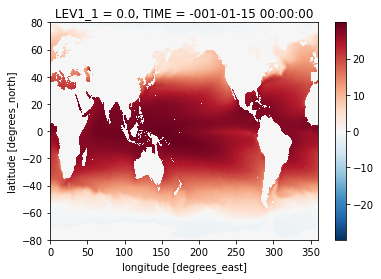

In [123]:
sst = xr.where(ds0.maskC, sst, 0)
sst.plot()

In [125]:
sst_tracer = sst.values.astype('>f4')

fn = out_path + 'sst_tracer.bin'

write_field(fn, sst_tracer)

wrote to file: /data/home/liutongya/mixing/BINS/sst_tracer.bin


## streamfunction